In [1]:
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector

C:\Users\Omkar\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Omkar\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# Connecting to snowflake

In [2]:
conn = snowflake.connector.connect(
        user = 'OMKAR27',
        #password = getpass.getpass('YOUR PASSWORD : '),
        password = 'Omkar27@Snowflake',
        account = '***********',
        database = 'RETAILS',
        schema = 'PUBLIC',
        warehouse = 'COMPUTE_WH',
)

In [3]:
cur = conn.cursor()

In [4]:
select_demographic_raw = 'SELECT * FROM DEMOGRAPHIC_RAW'
select_campaign_desc_raw = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_campaign_raw = 'SELECT * FROM CAMPAIGN_RAW'
select_product_raw = 'SELECT * FROM PRODUCT_RAW'
select_coupon_raw = 'SELECT * FROM COUPON_RAW'
select_coupon_redempt_raw = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_transaction_raw = 'SELECT * FROM TRANSACTION_RAW'

In [5]:
cur.execute(select_demographic_raw)
demographic_raw = cur.fetch_pandas_all()

In [6]:
cur.execute(select_campaign_desc_raw)
campaign_desc_raw = cur.fetch_pandas_all()

In [7]:
cur.execute(select_campaign_raw)
campaign_raw = cur.fetch_pandas_all()

In [8]:
cur.execute(select_coupon_raw)
coupon_raw = cur.fetch_pandas_all()

In [9]:
cur.execute(select_coupon_redempt_raw)
coupon_redempt_raw = cur.fetch_pandas_all()

In [10]:
cur.execute(select_product_raw)
product_raw = cur.fetch_pandas_all()

In [11]:
cur.execute(select_transaction_raw)
transaction_raw = cur.fetch_pandas_all()

In [12]:
cur.close()
conn.close()

In [13]:
demographic_raw.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [14]:
demographic_raw.shape

(2500, 8)

In [15]:
demographic_raw.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [16]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [17]:
campaign_desc_raw.shape

(30, 4)

In [18]:
campaign_desc_raw.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [19]:
campaign_raw.head()

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [20]:
campaign_raw.shape

(7208, 3)

In [21]:
campaign_raw.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [22]:
coupon_raw.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [23]:
coupon_raw.shape

(124548, 3)

In [24]:
coupon_raw.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [25]:
coupon_redempt_raw.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [26]:
coupon_redempt_raw.shape

(2318, 4)

In [27]:
coupon_redempt_raw.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [28]:
product_raw.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [29]:
product_raw.shape

(92353, 7)

In [30]:
product_raw.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [31]:
transaction_raw.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [32]:
transaction_raw.shape

(2595732, 12)

In [33]:
transaction_raw.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

# Data Modifications

In [34]:
from datetime import datetime , timedelta

In [35]:
start_date = pd.to_datetime('2020-01-01')

In [36]:
transaction_raw.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [37]:
transaction_raw['Date'] = start_date + pd.to_timedelta(transaction_raw['DAY'],unit='D')

In [38]:
transaction_raw['Date']

0         2020-01-02
1         2020-01-02
2         2020-01-02
3         2020-01-02
4         2020-01-02
             ...    
2595727   2021-06-14
2595728   2021-06-14
2595729   2021-06-14
2595730   2021-06-14
2595731   2021-03-15
Name: Date, Length: 2595732, dtype: datetime64[ns]

In [39]:
campaign_desc_raw['Start_date'] = start_date + pd.to_timedelta(campaign_desc_raw['START_DAY'],unit='D')

In [40]:
campaign_desc_raw['End_date'] = start_date + pd.to_timedelta(campaign_desc_raw['END_DAY'],unit='D')

In [41]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date
0,TypeB,24,659,719,2021-10-21,2021-12-20
1,TypeC,15,547,708,2021-07-01,2021-12-09
2,TypeB,25,659,691,2021-10-21,2021-11-22
3,TypeC,20,615,685,2021-09-07,2021-11-16
4,TypeB,23,646,684,2021-10-08,2021-11-15


In [42]:
coupon_redempt_raw['Date'] = start_date + pd.to_timedelta(coupon_redempt_raw['DAY'],unit='D')

In [43]:
coupon_redempt_raw.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20


In [44]:
campaign_desc_raw['Campaign_duration'] = campaign_desc_raw['END_DAY'] - campaign_desc_raw['START_DAY']

In [45]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_duration
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38


In [46]:
transaction_raw['Date'].max()

Timestamp('2021-12-12 00:00:00')

In [47]:
campaign_desc_raw['End_date'].max()

Timestamp('2021-12-20 00:00:00')

In [48]:
coupon_redempt_raw['Date'].max()

Timestamp('2021-12-05 00:00:00')

In [49]:
demographic_raw.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
HOUSEHOLD_KEY           int16
dtype: object

In [50]:
demographic_raw['AGE_DESC'].value_counts()

45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: AGE_DESC, dtype: int64

In [51]:
demographic_raw['HOUSEHOLD_SIZE_DESC'].value_counts()

2     1004
1      783
3      338
5+     206
4      169
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

In [52]:
campaign_desc_raw.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
Start_date           datetime64[ns]
End_date             datetime64[ns]
Campaign_duration             int16
dtype: object

In [53]:
campaign_desc_raw['Campaign_duration'].mean() ## Average duration of campaign

46.6

<Axes: xlabel='CAMPAIGN', ylabel='Campaign_duration'>

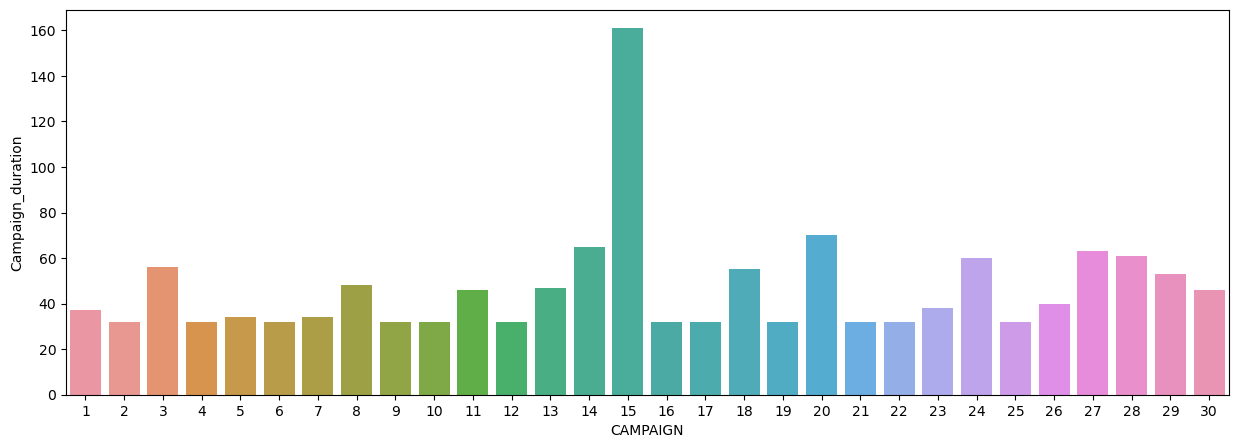

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Campaign_duration',data=campaign_desc_raw)

In [55]:
campaign_desc_raw['CAMPAIGN'].unique() ## Campaign 15 lasted for more than 160 days

array([24, 15, 25, 20, 23, 21, 22, 18, 19, 17, 14, 16, 13, 11, 12, 10,  9,
        8,  7,  6,  3,  5,  4,  1,  2, 30, 29, 28, 27, 26], dtype=int8)

In [56]:
campaign_desc_raw.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','Campaign_duration':'mean'})

,CAMPAIGN,Campaign_duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


There are 19 campaign of type b with average duration of 38 days. same goes for others

In [57]:
campaign_desc_raw['Start_month'] = campaign_desc_raw['Start_date'].dt.strftime('%m')

In [58]:
campaign_desc_raw['Start_year'] = campaign_desc_raw['Start_date'].dt.year

In [59]:
campaign_desc_raw['End_month'] = campaign_desc_raw['End_date'].dt.strftime('%m')

In [60]:
campaign_desc_raw['End_year'] = campaign_desc_raw['End_date'].dt.year

In [61]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,2021,12,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,2021,12,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,2021,11,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,2021,11,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,2021,11,2021


In [62]:
campaign_desc_raw.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
Start_date           datetime64[ns]
End_date             datetime64[ns]
Campaign_duration             int16
Start_month                  object
Start_year                    int64
End_month                    object
End_year                      int64
dtype: object

In [63]:
campaign_raw['HOUSEHOLD_KEY'].nunique() , campaign_raw.shape

(1584, (7208, 3))

Outof 2500 only 1584 participated in campaigns i.e. 916 did not participate

Text(0, 0.5, 'Number of household reached to')

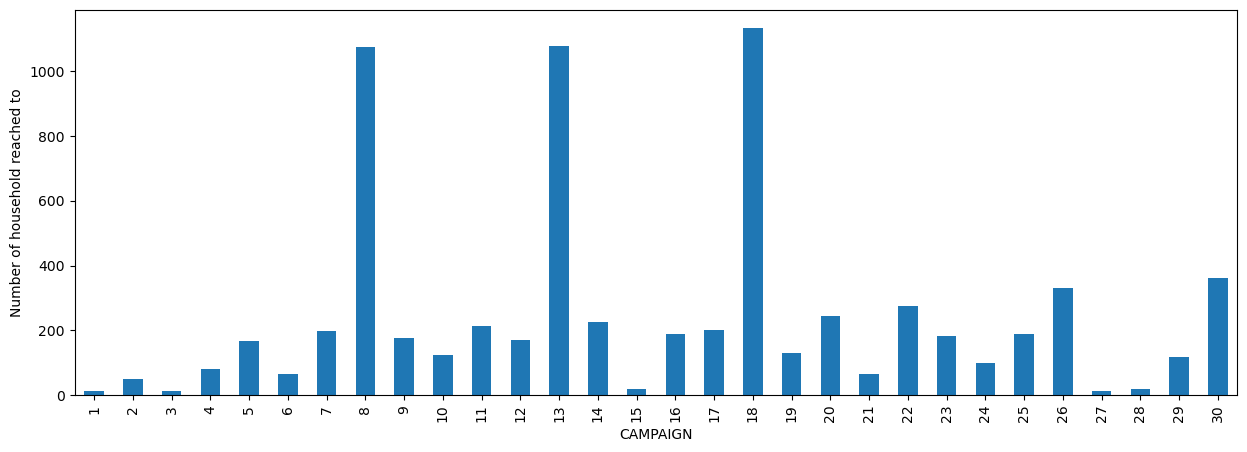

In [64]:
plt.figure(figsize=(15,5))
campaign_raw.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of household reached to')

Campaign 8 , 13 , 18 have reached more household

In [65]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,2021,12,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,2021,12,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,2021,11,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,2021,11,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,2021,11,2021


In [66]:
coupon_raw.shape

(124548, 3)

In [67]:
coupon_raw.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [68]:
coupon_raw['COUPON_UPC'].nunique()

1135

In [69]:
coupon_given = coupon_raw.groupby('CAMPAIGN').aggregate(Total_product=('PRODUCT_ID','nunique'),
                                                       Total_Coupon_Given = ('COUPON_UPC','nunique'))

In [70]:
coupon_given = coupon_given.sort_values(by='Total_product',ascending=False)

In [71]:
coupon_given.head()

,Total_product,Total_Coupon_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [72]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,2021,12,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,2021,12,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,2021,11,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,2021,11,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,2021,11,2021


In [73]:
coupon_given = coupon_given.merge(right=campaign_desc_raw,on='CAMPAIGN',how='left')

In [74]:
coupon_given.head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,13,35616,207,TypeA,504,551,2021-05-19,2021-07-05,47,05,2021,07,2021
1,18,35513,209,TypeA,587,642,2021-08-10,2021-10-04,55,08,2021,10,2021
2,8,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,2021,04,2021
3,26,3396,181,TypeA,224,264,2020-08-12,2020-09-21,40,08,2020,09,2020
4,30,3205,181,TypeA,323,369,2020-11-19,2021-01-04,46,11,2020,01,2021
5,22,1917,21,TypeB,624,656,2021-09-16,2021-10-18,32,09,2021,10,2021
6,24,1887,2,TypeB,659,719,2021-10-21,2021-12-20,60,10,2021,12,2021
7,16,1025,13,TypeB,561,593,2021-07-15,2021-08-16,32,07,2021,08,2021
8,25,826,17,TypeB,659,691,2021-10-21,2021-11-22,32,10,2021,11,2021
9,9,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,2021,04,2021


In [75]:
coupon_given.isnull().sum()

CAMPAIGN              0
Total_product         0
Total_Coupon_Given    0
DESCRIPTION           0
START_DAY             0
END_DAY               0
Start_date            0
End_date              0
Campaign_duration     0
Start_month           0
Start_year            0
End_month             0
End_year              0
dtype: int64

In [76]:
coupon_given.columns

Index(['CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'Start_date', 'End_date', 'Campaign_duration',
       'Start_month', 'Start_year', 'End_month', 'End_year'],
      dtype='object')

In [77]:
coupon_given.loc[:,('CAMPAIGN','Total_product', 'Total_Coupon_Given','Start_month','Start_year', 'End_month','End_year','DESCRIPTION','Campaign_duration')].sort_values(by='Total_product',
ascending=False).head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,Start_month,Start_year,End_month,End_year,DESCRIPTION,Campaign_duration
0,13,35616,207,05,2021,07,2021,TypeA,47
1,18,35513,209,08,2021,10,2021,TypeA,55
2,8,17178,209,02,2021,04,2021,TypeA,48
3,26,3396,181,08,2020,09,2020,TypeA,40
4,30,3205,181,11,2020,01,2021,TypeA,46
5,22,1917,21,09,2021,10,2021,TypeB,32
6,24,1887,2,10,2021,12,2021,TypeB,60
7,16,1025,13,07,2021,08,2021,TypeB,32
8,25,826,17,10,2021,11,2021,TypeB,32
9,9,825,18,03,2021,04,2021,TypeB,32


In [78]:
product_raw.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [79]:
coupon_raw.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [80]:
coupon_product = coupon_raw.merge(right=product_raw,on='PRODUCT_ID',how='left')

In [81]:
coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [82]:
coupon_product.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [83]:
coupon_product.groupby('DEPARTMENT').aggregate(Count=('CAMPAIGN','count')).sort_values(by='Count',ascending=False).head(10)

,Count
DEPARTMENT,
GROCERY,51507
DRUG GM,33780
PRODUCE,8276
MEAT,7548
MEAT-PCKGD,7547
COSMETICS,6618
FLORAL,2673
NUTRITION,2281
SEAFOOD-PCKGD,2192


## Grocery , Drug GM , Produce have conducted highest campaign 

In [84]:
coupon_product['COMMODITY_DESC'].value_counts()

HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
                          ... 
SUSHI                        2
BOOKSTORE                    1
COFFEE SHOP                  1
TICKETS                      1
BEVERAGE                     1
Name: COMMODITY_DESC, Length: 266, dtype: int64

In [85]:
coupon_product['COMMODITY_DESC'].nunique()

266

Most prominent products among coupons created are bathroom products such as hair care and makeup

In [86]:
coupon_redempt_raw.shape

(2318, 5)

In [87]:
coupon_redempt_raw.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'Date'], dtype='object')

In [88]:
coupon_redempt_raw['COUPON_UPC'].nunique()

556

only 556 out of 1135 have been used

<Axes: xlabel='CAMPAIGN'>

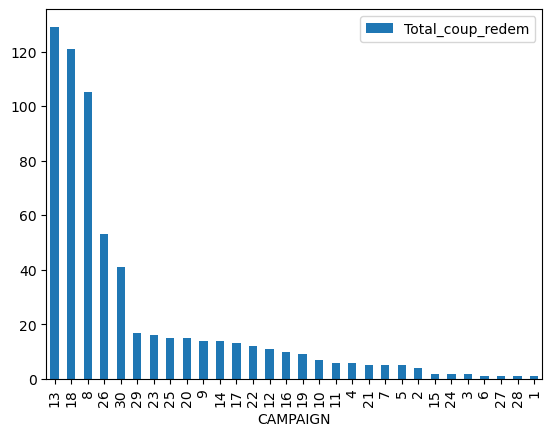

In [89]:
coupon_redempt_raw.groupby('CAMPAIGN').agg(Total_coup_redem = ('COUPON_UPC','nunique')).sort_values(by='Total_coup_redem',ascending=False).plot.bar()

In [90]:
coupon_redeem = coupon_redempt_raw.groupby('CAMPAIGN').agg(Total_coup_redem = ('COUPON_UPC','nunique'))

In [91]:
coupon_redeem.sort_values(by='Total_coup_redem',ascending=False)

,Total_coup_redem
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41
29,17
23,16
25,15
20,15


In [92]:
coupon_redeem = coupon_redeem.merge(right=coupon_given,on='CAMPAIGN',how='left')

In [93]:
coupon_redeem.head()

,CAMPAIGN,Total_coup_redem,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,2020,01,2021
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,2020,01,2021
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,2020,02,2021
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,2021,02,2021
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,2021,02,2021


In [94]:
coupon_redeem['Coupon_redeem_rate'] = (coupon_redeem['Total_coup_redem'] / coupon_redeem['Total_Coupon_Given']) * 100

<Axes: xlabel='CAMPAIGN', ylabel='Coupon_redeem_rate'>

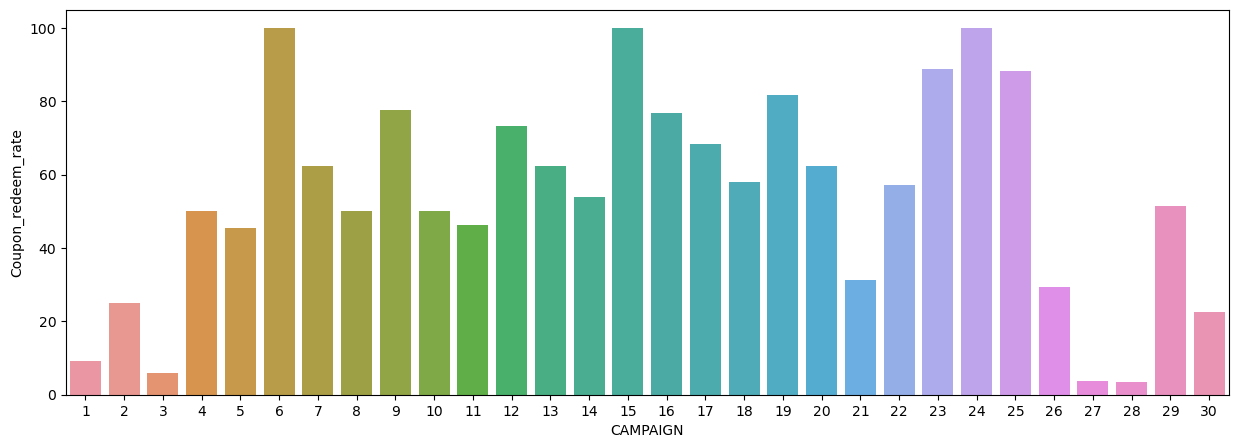

In [95]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_redeem_rate',data=coupon_redeem)

In [96]:
transaction_raw.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [97]:
transaction_raw.shape

(2595732, 13)

In [98]:
transaction_raw.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [99]:
transaction_raw['BASKET_ID'].count()

2595732

In [100]:
transaction_raw['BASKET_ID'].nunique()

276484

In [101]:
transaction_raw['HOUSEHOLD_KEY'].nunique()

2500

In [102]:
trnx_bucket = transaction_raw.groupby('BASKET_ID').agg({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [103]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [104]:
trnx_bucket['Use_coupon'] = trnx_bucket['COUPON_DISC']!=0

In [105]:
trnx_bucket['Use_coupon'].value_counts()

False    260812
True      15672
Name: Use_coupon, dtype: int64

In [106]:
trnx_bucket.sort_values('SALES_VALUE',ascending=False).head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
BASKET_ID,,,,
32006114302,961.49,0,0,False
40387571385,681.58,0,0,False
33347880492,552.92,-3,0,True
32505140858,545.17,0,0,False
30983766334,545.07,0,0,False
35638473903,543.83,0,0,False
34267311742,518.01,0,0,False
30515165970,508.58,0,0,False
32187143334,499.99,0,0,False


In [107]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

29.14

The Average basket value is 26.93

Text(0.5, 1.0, 'Basket value boxplot')

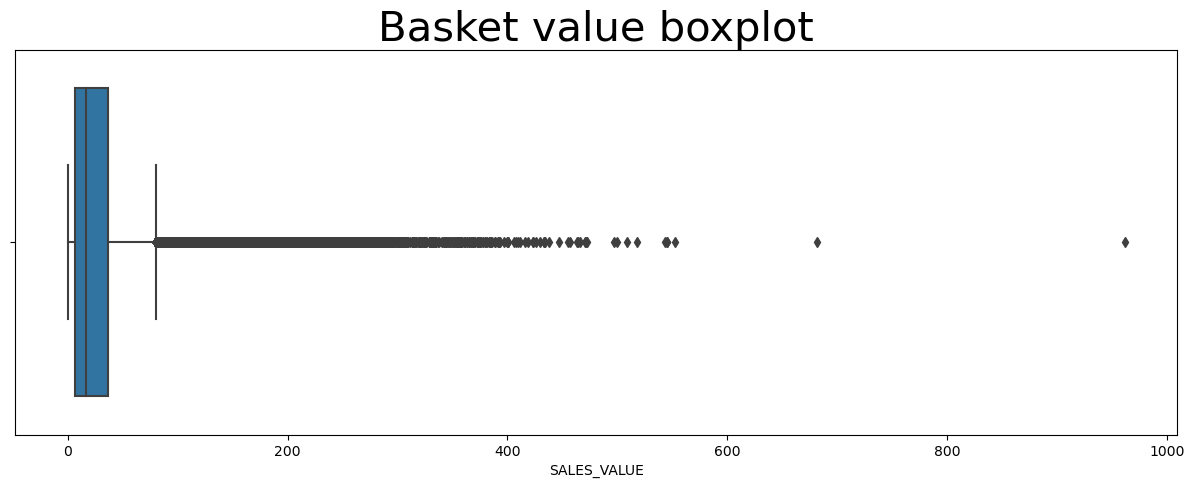

In [108]:
plt.figure(figsize=(15,5))
sns.boxplot(x=trnx_bucket['SALES_VALUE'])
plt.title('Basket value boxplot',fontsize=30)

In [109]:
trnx_bucket.groupby('Use_coupon').agg(sales_mean = ('SALES_VALUE','mean'),
                                     COUPON_DISC_mean =('COUPON_DISC','mean'),
                                      COUPON_MATCH_DISC_mean = ('COUPON_MATCH_DISC','mean'),
                                      Num_coupon = ('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC_mean,Num_coupon
Use_coupon,,,,
False,26.795021,0.000000,-0.000019,260812
True,68.210833,-2.986536,-0.426748,15672


In [110]:
transaction_raw.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [111]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False


The average basket value without coupon is 25 . 
The average basket value with coupon is 62

In [112]:
trnx_desc = transaction_raw.merge(right=trnx_bucket,on='BASKET_ID',how='left')

In [113]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,5.91,0,0,False


In [114]:
trnx_desc = trnx_desc.merge(right=product_raw,on='PRODUCT_ID',how='left')

In [115]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [116]:
trnx_desc.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE_x', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC_x', 'COUPON_MATCH_DISC_x', 'Date', 'SALES_VALUE_y',
       'COUPON_DISC_y', 'COUPON_MATCH_DISC_y', 'Use_coupon', 'MANUFACTURER',
       'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [117]:
trnx_desc.drop(['SALES_VALUE_y',
       'COUPON_DISC_y', 'COUPON_MATCH_DISC_y'],axis=1,inplace=True)

In [118]:
trnx_desc.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE_x', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC_x', 'COUPON_MATCH_DISC_x', 'Date', 'Use_coupon',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [119]:
commodity_coupon = trnx_desc.groupby('COMMODITY_DESC').agg(total_quantity=('QUANTITY','count'),
                                                          Use_coupon = ('Use_coupon','sum'),
                                                          Coupon = ('COUPON_DISC_x','sum'))

In [120]:
commodity_coupon['Coupon%'] = round((commodity_coupon['Use_coupon'] / commodity_coupon['total_quantity'])*100,2)

In [121]:
commodity_coupon.sort_values('Coupon%',ascending=False).head(10)

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
,7839,6019,-10596,76.78
BABY FOODS,20356,5648,-349,27.75
RESTRICTED DIET,51,13,0,25.49
DIAPERS & DISPOSABLES,5008,1216,-1110,24.28
AIR CARE,5556,1320,-929,23.76
FRZN SEAFOOD,64,15,0,23.44
BULK FOODS,9,2,0,22.22
BABY HBC,4626,1020,-325,22.05
FRZN BREAKFAST FOODS,10595,2286,-421,21.58


In [122]:
transaction_raw.groupby(transaction_raw['Date'].dt.year).agg({'SALES_VALUE':'sum' , 'RETAIL_DISC':'sum','COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
Date,,,
2020,3645902.74,-641463.08,-18856
2021,4411560.34,-756871.76,-27949


# Droping columns

In [123]:
campaign_desc_raw.columns

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'Start_date',
       'End_date', 'Campaign_duration', 'Start_month', 'Start_year',
       'End_month', 'End_year'],
      dtype='object')

In [124]:
campaign_desc_raw.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [125]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,2021,12,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,2021,12,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,2021,11,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,2021,11,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,2021,11,2021


In [126]:
campaign_desc_raw['Start_date'] = pd.to_datetime(campaign_desc_raw['Start_date']).apply(lambda x: x.date())

In [127]:
campaign_desc_raw['End_date'] = pd.to_datetime(campaign_desc_raw['End_date']).apply(lambda x: x.date())

In [128]:
campaign_desc_raw.dtypes

DESCRIPTION          object
CAMPAIGN               int8
Start_date           object
End_date             object
Campaign_duration     int16
Start_month          object
Start_year            int64
End_month            object
End_year              int64
dtype: object

In [129]:
coupon_redempt_raw.drop(['DAY'],axis=1,inplace=True)

In [130]:
coupon_redempt_raw.head()

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03
3,1,10000085476,18,2021-08-20
4,1,54200029176,18,2021-08-20


In [131]:
coupon_redempt_raw['Date'] = pd.to_datetime(coupon_redempt_raw['Date']).apply(lambda x: x.date())

In [132]:
coupon_redempt_raw.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [133]:
transaction_raw.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [134]:
transaction_raw.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [135]:
transaction_raw['Date'] = pd.to_datetime(transaction_raw['Date']).apply(lambda x: x.date())

In [136]:
transaction_raw.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int32
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

# Now loading data into snowflake using sqlalchemy

In [137]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [138]:
conn = snowflake.connector.connect(
        user = 'OMKAR27',
        #password = getpass.getpass('YOUR PASSWORD : '),
        password = 'Omkar27@Snowflake',
        account = 'qvbuxsd-oj92506',
        database = 'RETAILS',
        schema = 'PUBLIC',
        warehouse = 'COMPUTE_WH',
)

In [139]:
cur = conn.cursor()

In [140]:
campaign_desc_raw.head()

,DESCRIPTION,CAMPAIGN,Start_date,End_date,Campaign_duration,Start_month,Start_year,End_month,End_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,2021,12,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,2021,12,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,2021,11,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,2021,11,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,2021,11,2021


In [141]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
( DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date date,
Campaign_duration NUMBER(38,0),
Start_month VARCHAR(10),
Start_year INT,
End_month VARCHAR(10),
End_year INT
)
''')

In [142]:
success,nchunks,nrows , _ = write_pandas(conn,campaign_desc_raw,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success) + ',' + str(nchunks) + ',' + str(nrows))

True,1,30


In [143]:
coupon_redempt_raw.head()

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03
3,1,10000085476,18,2021-08-20
4,1,54200029176,18,2021-08-20


In [144]:
cur.execute('''
CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
( HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)
''')

In [145]:
success,nchunks,nrows , _ = write_pandas(conn,coupon_redempt_raw,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success) + ',' + str(nchunks) + ',' + str(nrows))

True,1,2318


In [146]:
transaction_raw.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2020-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2020-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2020-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2020-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2020-01-02


In [147]:
cur.execute('''
CREATE OR REPLACE TABLE TRANSACTION_NEW
( HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [148]:
success,nchunks,nrows , _ = write_pandas(conn,transaction_raw,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success) + ',' + str(nchunks) + ',' + str(nrows))

True,1,2595732


In [149]:
cur.close()
conn.close()